# COVID-19 Clinical trials Analysis

## Import libraries and packages

In [60]:
# pandas, numpy
import pandas as pd
import numpy as np
import csv

# Seaborn, matplotlib
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

from collections import Counter
from wordcloud import WordCloud, STOPWORDS 
import re

## Load Dataset

In [11]:
df= pd.read_csv('COVID_clinical_trials.csv')

# View the imported dataset
print (df.head(5))
print (df.info())
print (df.columns)

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [12]:
print (df.shape)

(5783, 27)


## Data Cleaning

### Checking and managing missing values

In [13]:
# Check for missing values
missing_values= df.isnull().sum()
print ("\nTotal missing values:\n",missing_values)

# Filling the missing data
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(-1)

# Check again for missing values
missing_values_after = df.isnull().sum()
print("\nMissing values after filling:\n", missing_values_after)


Total missing values:
 Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64

Missing values after filling:
 Rank                       0
NCT Number                 0
Title    

### Checking and managing duplicated values

In [14]:
# Check for duplicate rows
duplicates= df.duplicated().sum()
print("\nTotal Duplicates:",duplicates)


Total Duplicates: 0


### Removing columns unlikely to be useful in analysis

In [ ]:
# Drop columns unlikely to be useful in summary analysis
df= df.drop (columns=['Rank', 'Other IDs', 'URL', 'Study Documents', 'Results First Posted'])

print (df.shape) # 5 columns dropped

(5783, 22)


### Save the cleaned dataset

In [16]:
# Save cleaned version
df.to_csv('Covid_clinical_trial_dataset_cleaned.csv', index=False)
df.shape

(5783, 22)

## Exploratory Data Analysis

### Univariate Analysis

Setting the theme

In [25]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/1514805795.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=counts.index, x=counts.values, palette=palette)


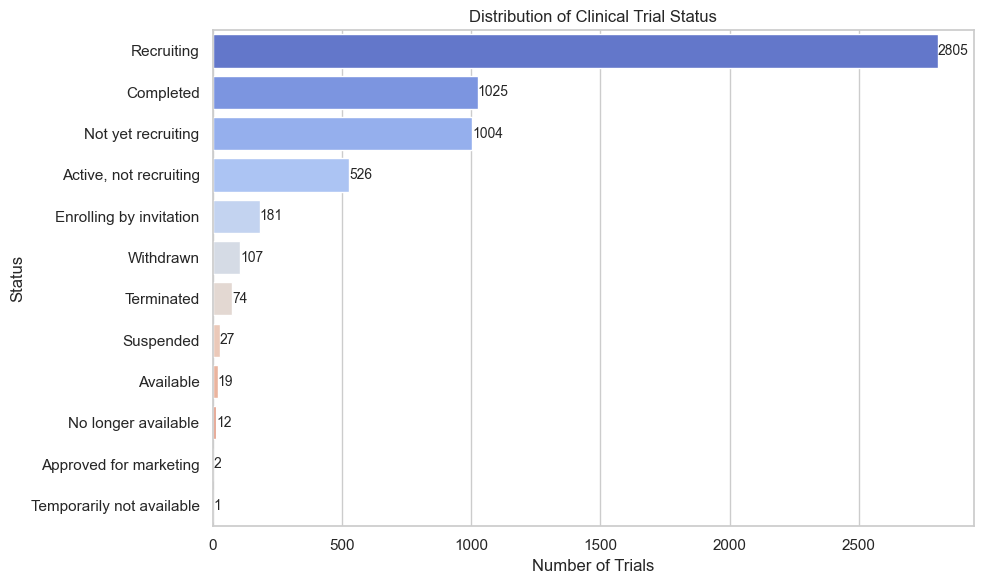

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/1514805795.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=counts.index, x=counts.values, palette=palette)


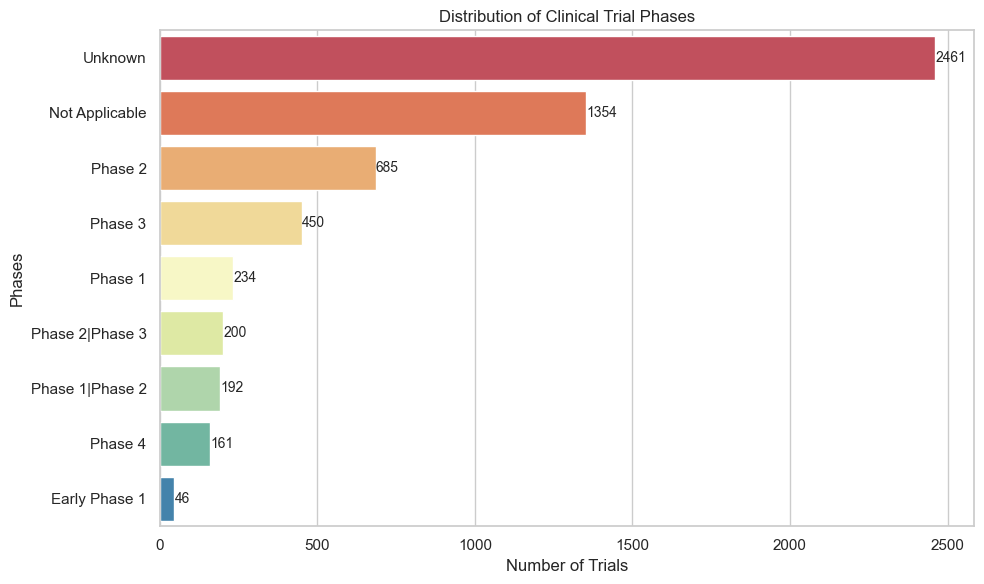

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/1514805795.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=counts.index, x=counts.values, palette=palette)
/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/1514805795.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


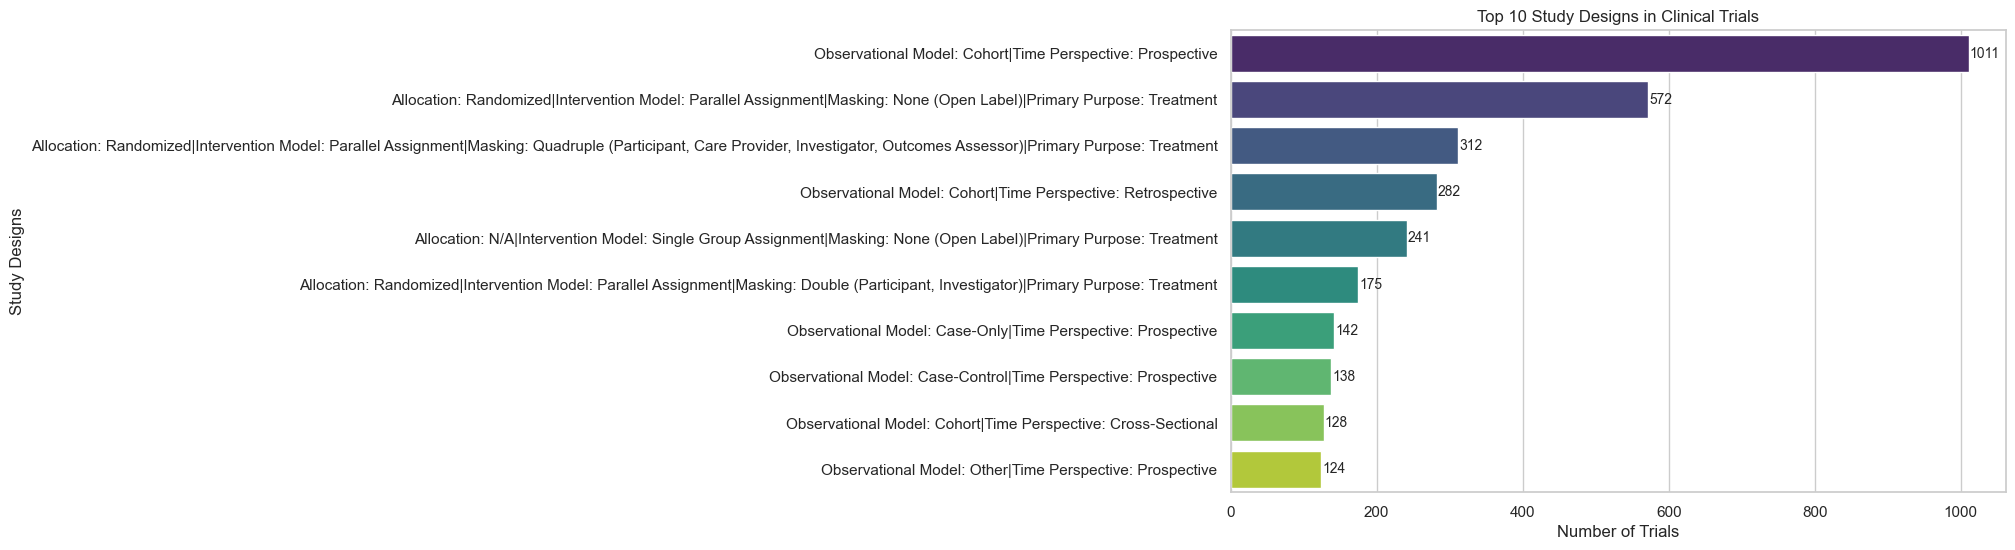

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/1514805795.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=counts.index, x=counts.values, palette=palette)


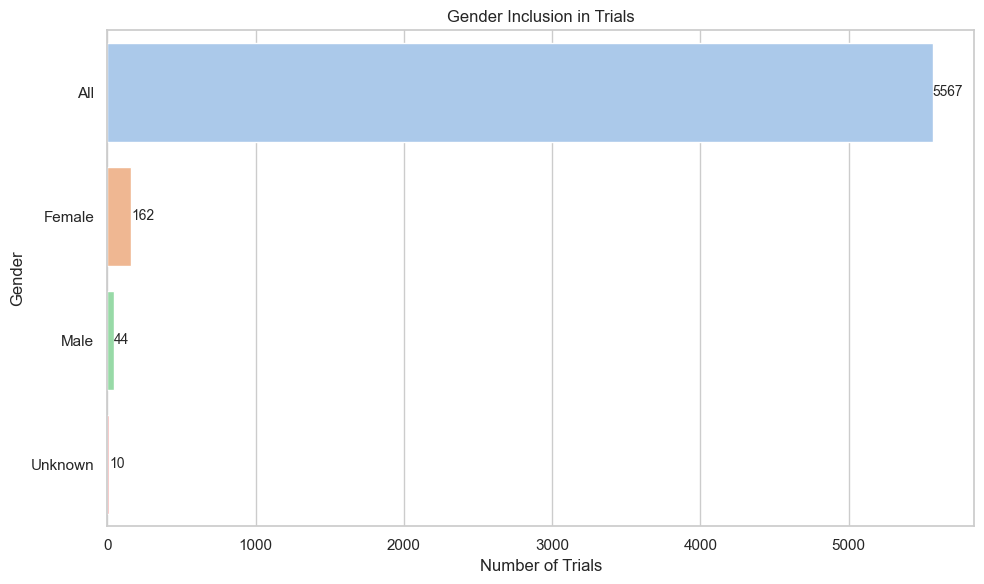

In [30]:
# Utility function to add count labels
def add_labels(ax):
    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(f'{count}', 
                    (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10)

# Plotting function
def plot_distribution(data, column, title, filename, top_n=None, palette="Set2"):
    plt.figure()
    counts = data[column].value_counts()
    if top_n:
        counts = counts[:top_n]
    ax = sns.barplot(y=counts.index, x=counts.values, palette=palette)
    plt.title(title)
    plt.xlabel('Number of Trials')
    plt.ylabel(column)
    add_labels(ax)
    plt.tight_layout()
    plt.savefig(f'plots/Univariate_Analysis/{filename}.png')
    plt.show()

# Plot different distributions
plot_distribution(df, 'Status', 'Distribution of Clinical Trial Status', 'trial_status', palette="coolwarm")
plot_distribution(df, 'Phases', 'Distribution of Clinical Trial Phases', 'trial_phases', palette="Spectral")
plot_distribution(df, 'Study Designs', 'Top 10 Study Designs in Clinical Trials', 'study_designs', top_n=10, palette="viridis")
plot_distribution(df, 'Gender', 'Gender Inclusion in Trials', 'gender_inclusion', palette="pastel")

Age Group Distribution

In [29]:
def clean_age(age):
    age = str(age).lower()
    if "child" in age:
        return "Child"
    elif "adolescent" in age:
        return "Adolescent"
    elif "adult" in age:
        return "Adult"
    elif "senior" in age or "older" in age or "65" in age:
        return "Senior"
    elif "all" in age:
        return "All Ages"
    elif "18" in age:
        return "Adult"
    elif "birth" in age or "newborn" in age:
        return "Child"
    else:
        return "Other"

df['Cleaned Age'] = df['Age'].apply(clean_age)

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/2172393005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Cleaned Age', order=df['Cleaned Age'].value_counts().index, palette='RdBu')


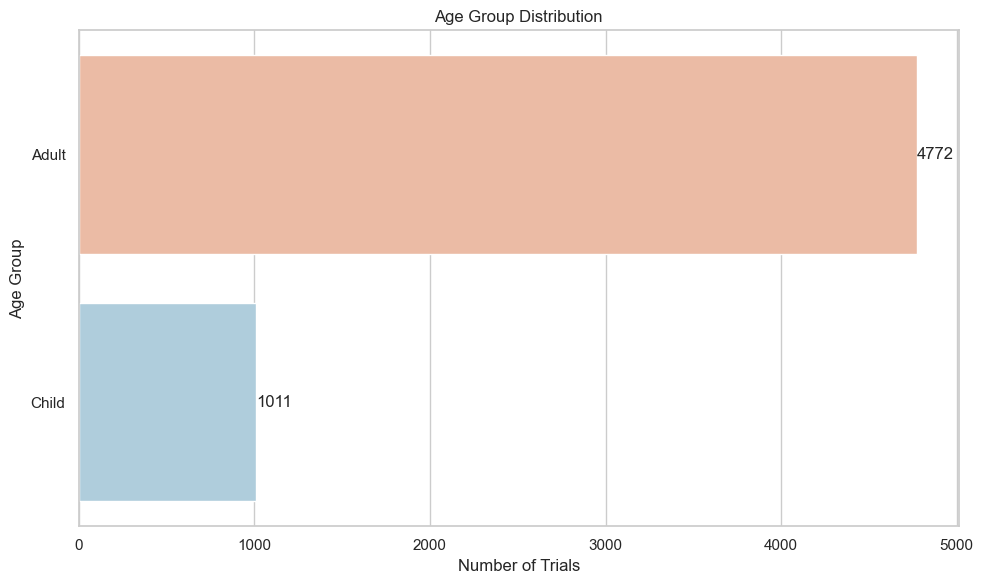

In [32]:
plt.figure()
ax = sns.countplot(data=df, y='Cleaned Age', order=df['Cleaned Age'].value_counts().index, palette='RdBu')
plt.title('Age Group Distribution')
plt.xlabel('Number of Trials')
plt.ylabel('Age Group')
for p in ax.patches:
    ax.annotate(int(p.get_width()), (p.get_width() + 1, p.get_y() + p.get_height() / 2), va='center')
plt.tight_layout()
plt.savefig('plots/Univariate_Analysis/age_group_distribution_cleaned.png')
plt.show()

## Bivariate Analysis

Status vs. Phases

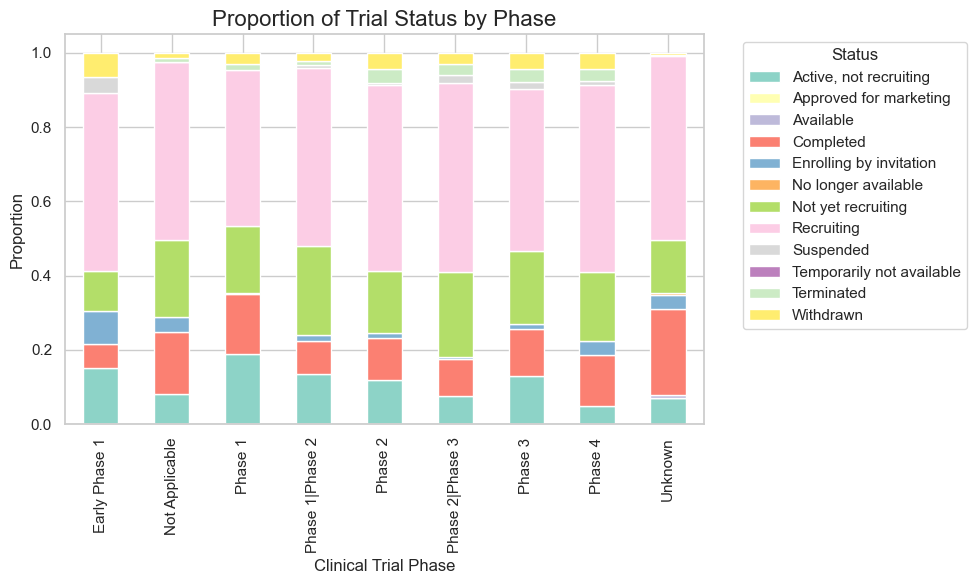

In [33]:
# Example: Trial Status vs Phase - Stacked
ct = pd.crosstab(df['Phases'], df['Status'], normalize='index')  # for % within each Phase
ct.plot(kind='bar', stacked=True, colormap='Set3', figsize=(10, 6))
plt.title('Proportion of Trial Status by Phase', fontsize=16)
plt.xlabel('Clinical Trial Phase')
plt.ylabel('Proportion')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/Bivariate_Analysis/stacked_status_vs_phase.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

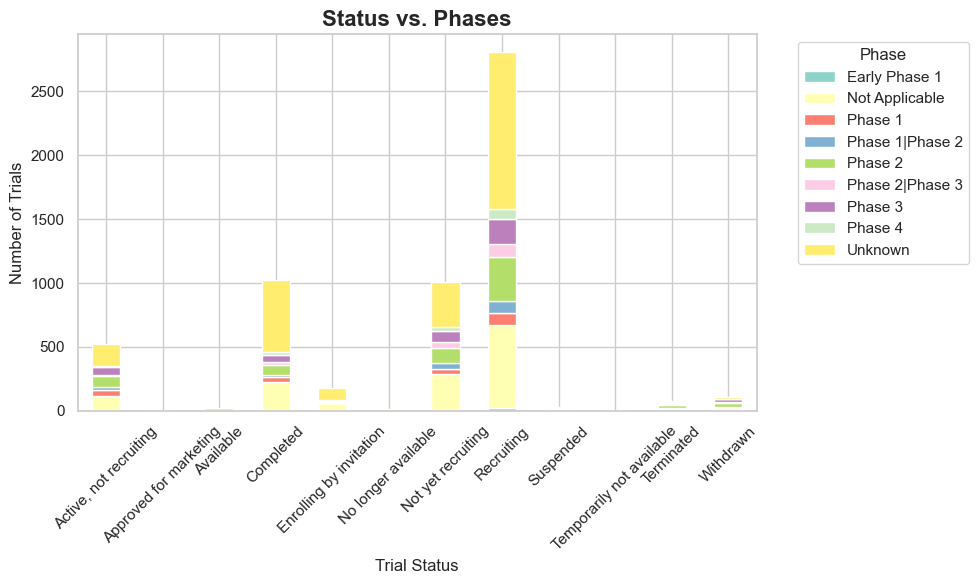

In [40]:
# Create crosstab
status_phase = pd.crosstab(df['Status'], df['Phases'])

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
status_phase.plot(kind='bar', stacked=True, colormap='Set3', figsize=(10, 6))
plt.title('Status vs. Phases', fontsize=16, weight='bold')
plt.xlabel('Trial Status', fontsize=12)
plt.ylabel('Number of Trials', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and show
plt.savefig('plots/Bivariate_Analysis/status_vs_phases.png')
plt.show()

Conditions vs. Outcome Measures

In [41]:
# Group and concatenate outcomes per condition
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x.dropna().unique())).reset_index()

# Preview table
print(conditions_outcomes.head(10))

                                          Conditions  \
0                             2019 Novel Coronavirus   
1                   2019 Novel Coronavirus Infection   
2  2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                   2019 Novel Coronavirus Pneumonia   
4          2019 Novel Coronavirus Pneumonia|COVID-19   
5                                    2019 nCoV, PD-1   
6                                          2019-nCoV   
7        2019-nCoV (COVID-19)|Interstitial Pneumonia   
8                                2019-nCoV Pneumonia   
9                         2019-nCoV Severe Pneumonia   

                                    Outcome Measures  
0  Proportion of participants who improve by at l...  
1  new-onset COVID-19|Number of Participants with...  
2  Number of participants with treatment emergent...  
3  Clinical recovery time|Complete fever time|Cou...  
4  Pneumonia severity index|Oxygenation index (Pa...  
5  lung injury score|absolute lymphocyte counts|s... 

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/4037779143.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




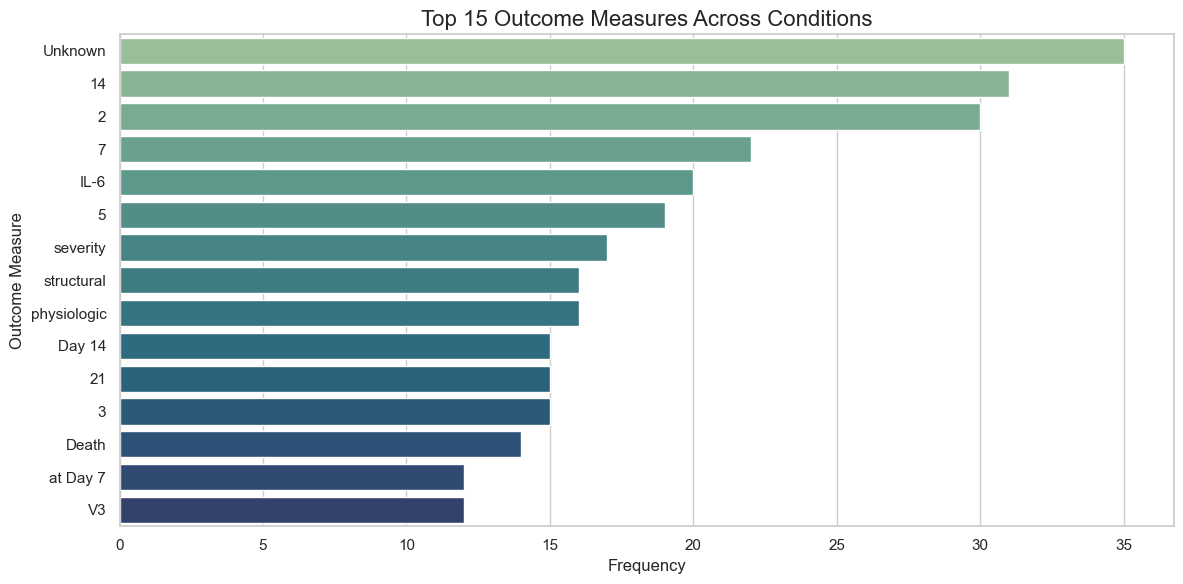

In [42]:
from collections import Counter
import seaborn as sns

# Flatten all outcome measures into words
outcomes = df['Outcome Measures'].dropna().str.split(',').explode().str.strip()
top_outcomes = pd.Series(outcomes).value_counts().nlargest(15)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_outcomes.index, x=top_outcomes.values, palette="crest")
plt.title('Top 15 Outcome Measures Across Conditions', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Outcome Measure')
plt.tight_layout()

# Save and show
plt.savefig('plots/Bivariate_Analysis/top_outcome_measures.png')
plt.show()

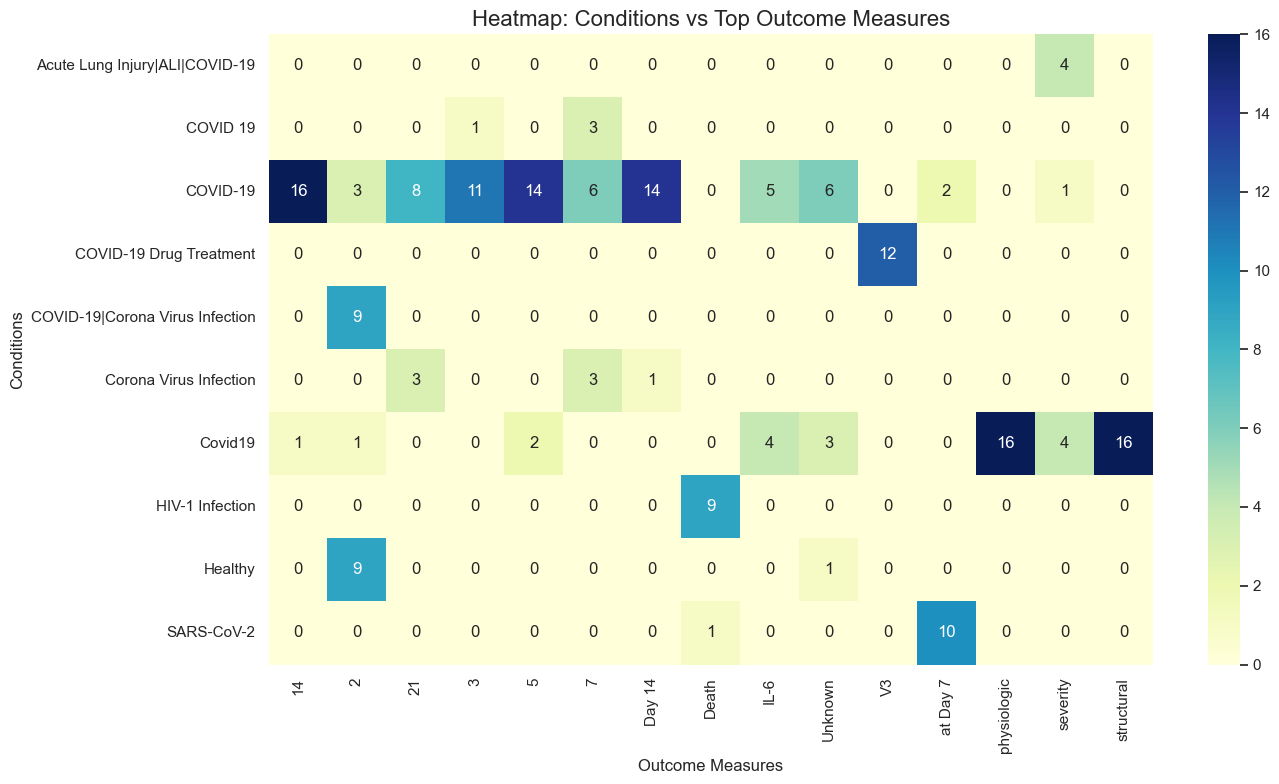

In [43]:
# Step 1: Clean and explode Outcome Measures
df_exploded = df.dropna(subset=['Conditions', 'Outcome Measures']).copy()
df_exploded['Outcome Measures'] = df_exploded['Outcome Measures'].str.split(',')
df_exploded = df_exploded.explode('Outcome Measures')
df_exploded['Outcome Measures'] = df_exploded['Outcome Measures'].str.strip()

# Step 2: Get Top N Outcome Measures
top_outcomes = df_exploded['Outcome Measures'].value_counts().nlargest(15).index

# Step 3: Filter for only top outcome measures
df_filtered = df_exploded[df_exploded['Outcome Measures'].isin(top_outcomes)]

# Step 4: Create a pivot table (Condition vs Outcome Measure)
heatmap_data = pd.crosstab(df_filtered['Conditions'], df_filtered['Outcome Measures'])

# Optional: Reduce to Top 10 Conditions for readability
top_conditions = df_filtered['Conditions'].value_counts().nlargest(10).index
heatmap_data = heatmap_data.loc[heatmap_data.index.isin(top_conditions)]

# Step 5: Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Conditions vs Top Outcome Measures', fontsize=16)
plt.xlabel('Outcome Measures')
plt.ylabel('Conditions')
plt.tight_layout()

# Save and show
plt.savefig('plots/Bivariate_Analysis/conditions_vs_outcome_measures_heatmap.png')
plt.show()

## Time Series Analysis

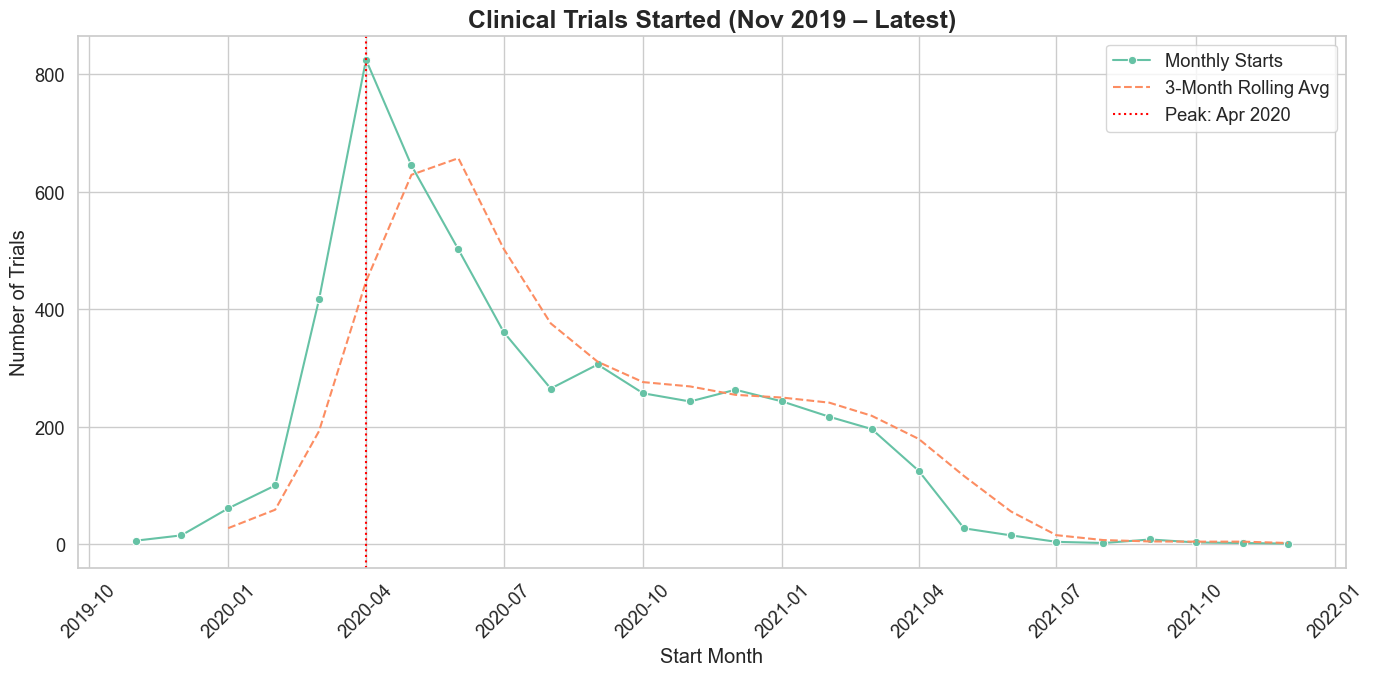

In [46]:
# Set the theme
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Step 1: Convert date columns
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

# Step 2: Group by month
monthly_counts = df['Start Date'].dt.to_period('M').value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()

# Step 3: Filter from Nov 2019 onward
start_cutoff = pd.Timestamp('2019-11-01')
monthly_counts_filtered = monthly_counts[monthly_counts.index >= start_cutoff]

# Step 4: Rolling average
rolling_avg = monthly_counts_filtered.rolling(window=3).mean()

# Step 5: Plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_counts_filtered.index, y=monthly_counts_filtered.values,
             marker='o', label='Monthly Starts')
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values,
             linestyle='--', label='3-Month Rolling Avg')

# Peak month
peak_month = monthly_counts_filtered.idxmax()
plt.axvline(peak_month, color='red', linestyle=':', label=f'Peak: {peak_month.strftime("%b %Y")}')

# Labels & layout
plt.title('Clinical Trials Started (Nov 2019 – Latest)', fontsize=18, weight='bold')
plt.xlabel('Start Month')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/Time_Series_Analysis/trials_started_from_2019_nov.png')
plt.show()

## Distributions by countries

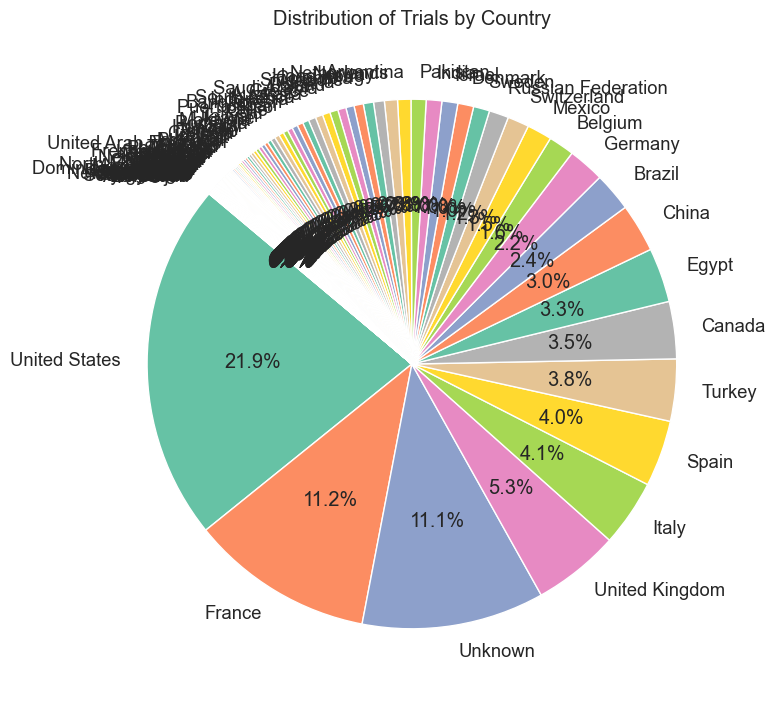

In [48]:
# Simplified country extraction (assumes each location contains a country at the end)
df['Country'] = df['Locations'].str.extract(r'(\b[A-Z][a-z]+(?: [A-Z][a-z]+)*$)')  # rough heuristic
df['Country'] = df['Country'].fillna('Unknown')

country_counts = df['Country'].value_counts()

# Pie chart of all countries
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Trials by Country')
plt.tight_layout()
plt.savefig('plots/Country_Distribution/pie_full_country_distribution.png')
plt.show()

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/2011830508.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




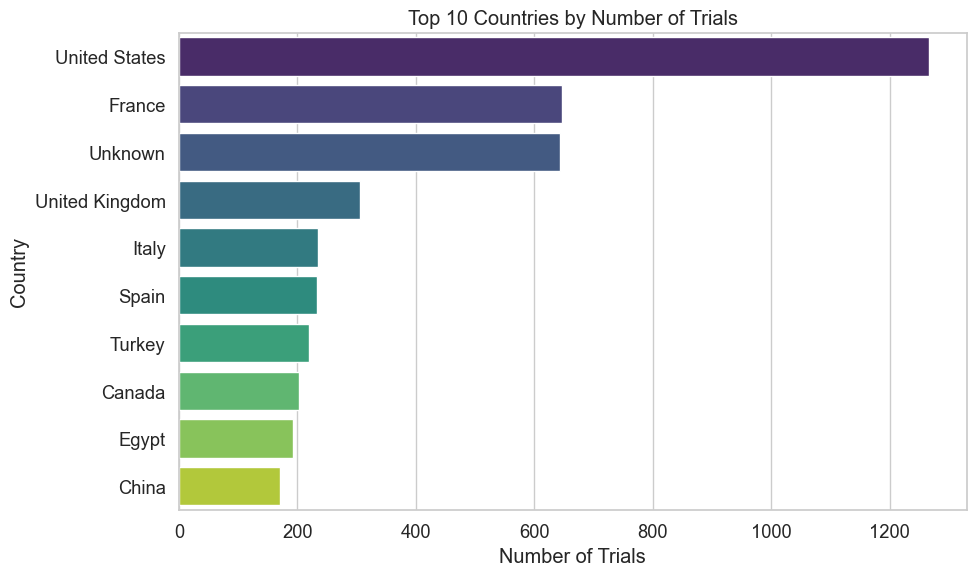

In [50]:
top_countries = country_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Trials')
plt.xlabel('Number of Trials')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('plots/Country_Distribution/top_10_countries.png')
plt.show()

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_45161/2059115089.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




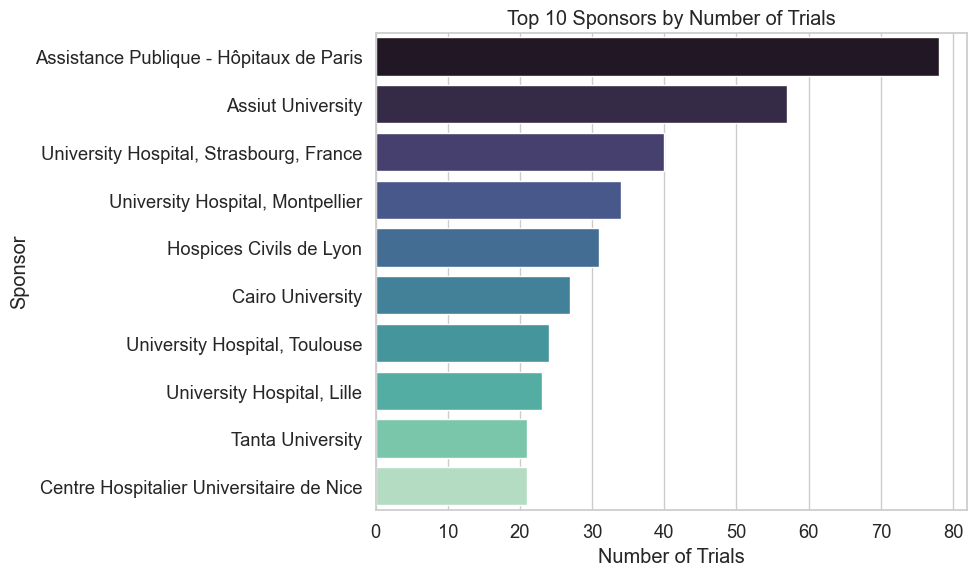

In [53]:
df['Sponsor'] = df['Sponsor/Collaborators'].str.strip()

top_sponsors = sponsor_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sponsors.values, y=top_sponsors.index, palette='mako')
plt.title('Top 10 Sponsors by Number of Trials')
plt.xlabel('Number of Trials')
plt.ylabel('Sponsor')
plt.tight_layout()
plt.savefig('plots/Country_Distribution/top_10_sponsors.png')
plt.show()

Wordcloud

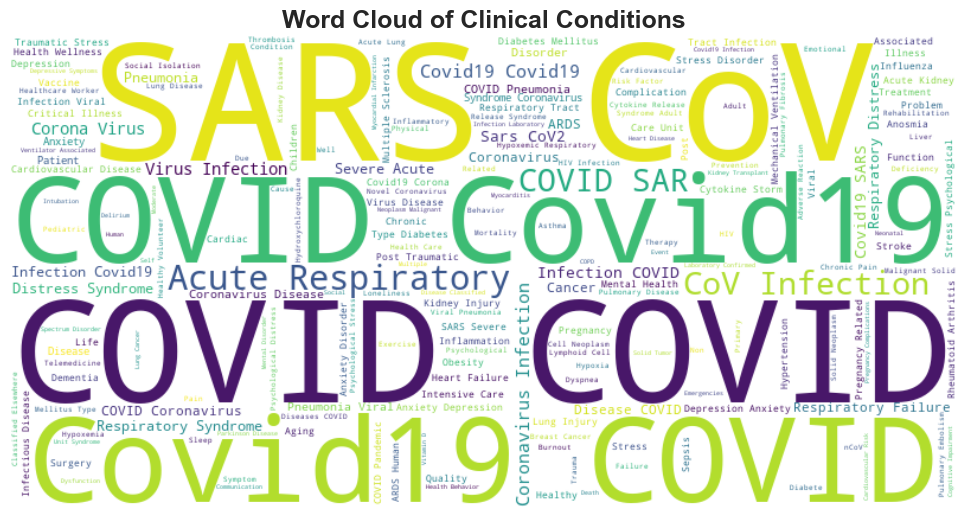

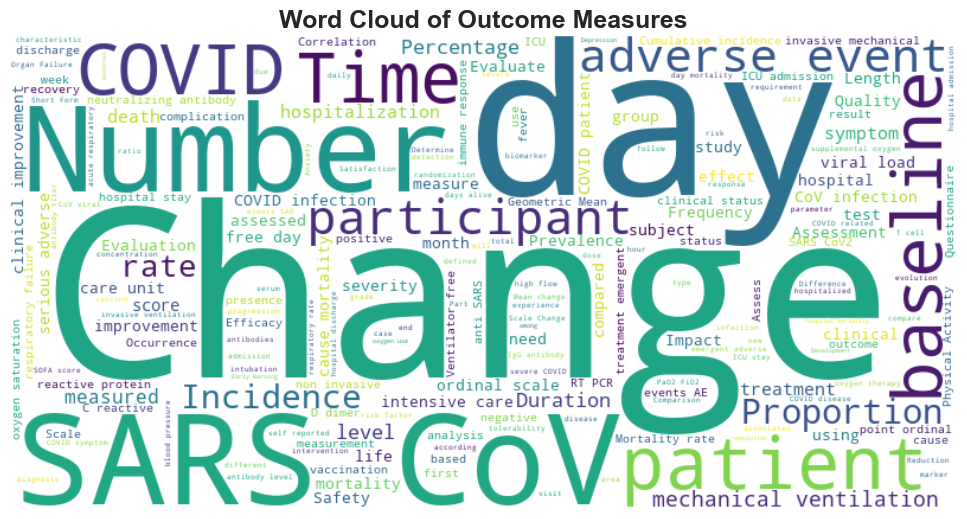

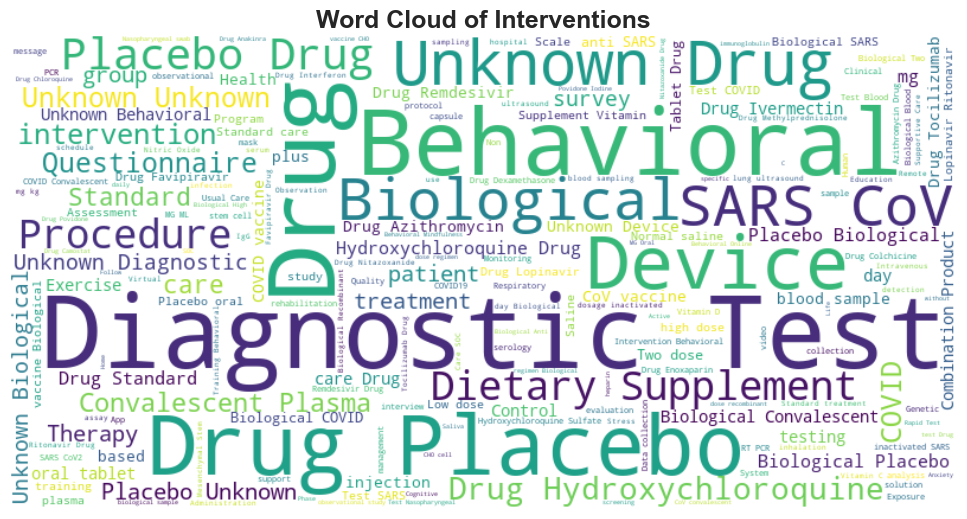

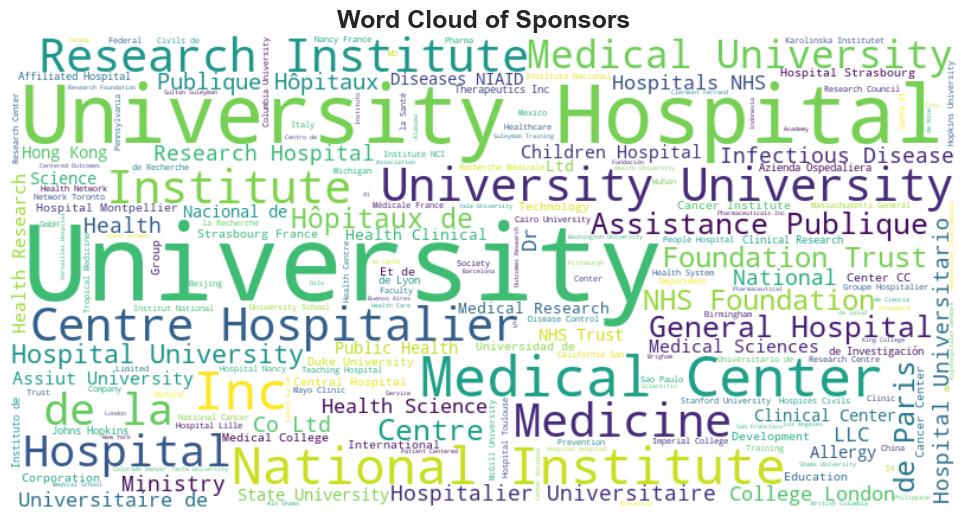

In [61]:
# Load the cleaned dataset
df = pd.read_csv("Covid_clinical_trial_dataset_cleaned.csv")  # Use your actual file name

# Define a function to generate and display a word cloud
def plot_wordcloud(column_data, title):
    text = ' '.join(column_data.dropna().astype(str).tolist())
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18, weight='bold')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

# Example word clouds
plot_wordcloud(df['Conditions'], "Word Cloud of Clinical Conditions")
plot_wordcloud(df['Outcome Measures'], "Word Cloud of Outcome Measures")
plot_wordcloud(df['Interventions'], "Word Cloud of Interventions")
plot_wordcloud(df['Sponsor/Collaborators'], "Word Cloud of Sponsors")